In [1]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.var()

PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Checking for null values

train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<a id = '2.0'></a>
<p style = "font-size : 35px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #f9b208; border-radius: 5px 5px;"><strong>Exploratory Data Analysis (EDA)</strong></p> 

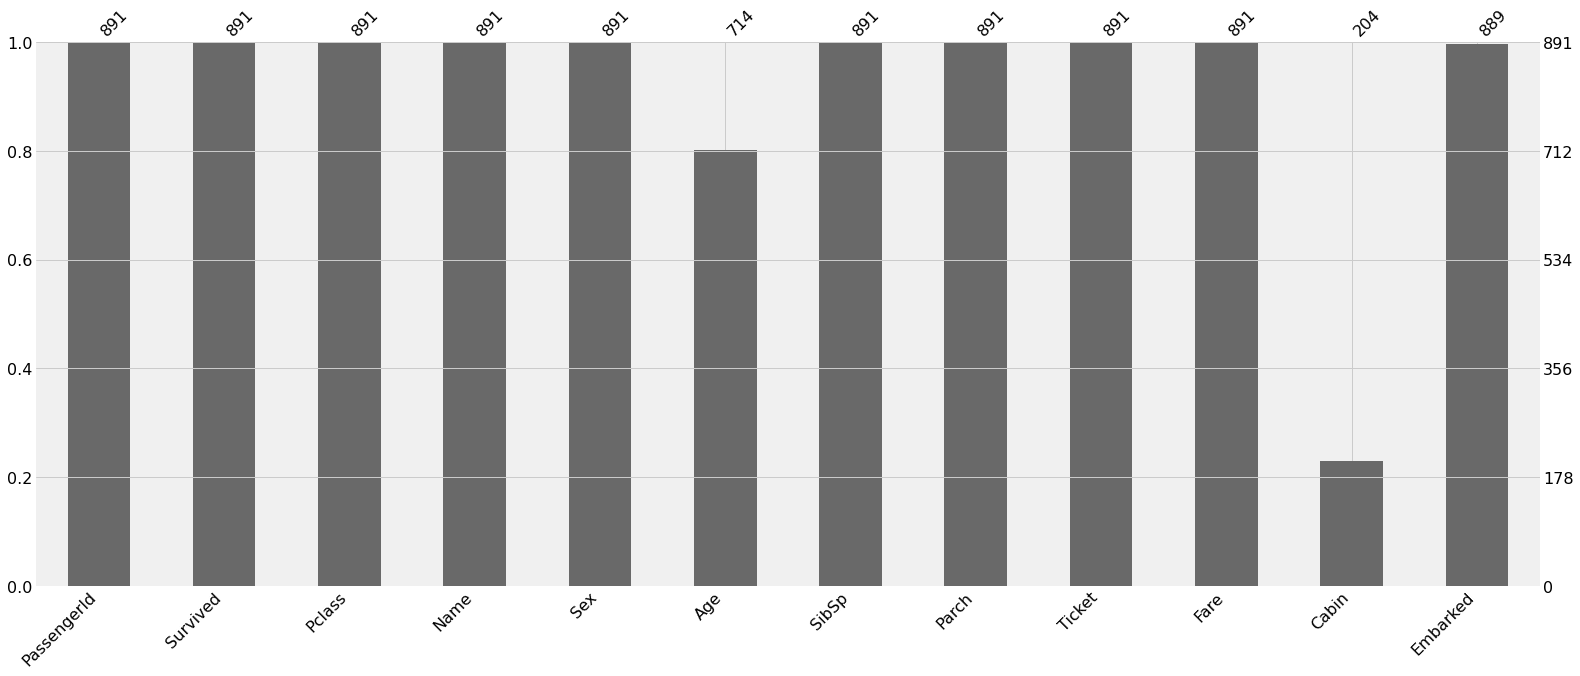

In [8]:
# visualizing null values

import missingno as msno

msno.bar(train_df)
plt.show()

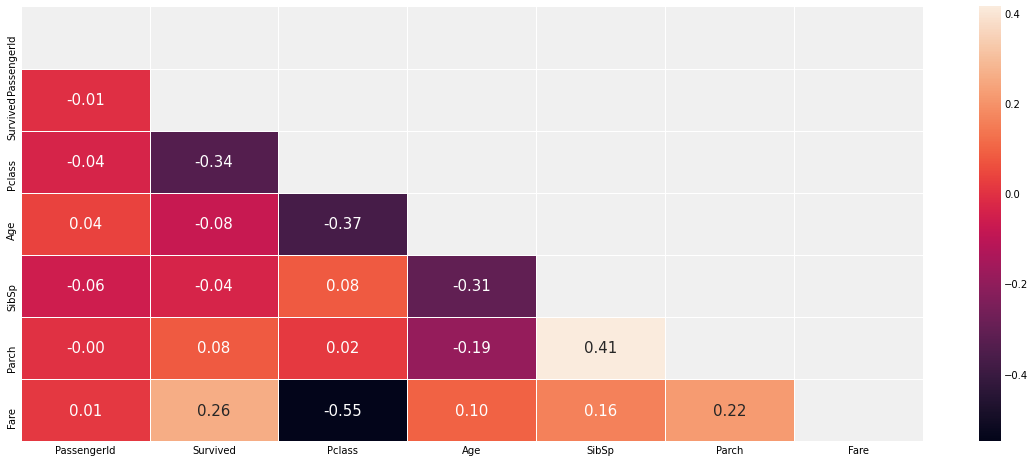

In [9]:
# heatmap

plt.figure(figsize = (18, 8))

corr = train_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, annot = True, fmt = '.2f', linewidths = 1, annot_kws = {'size' : 15})
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Heatmap is not useful in case of categorical variables, so we will analyse each column to check how each column is contributing in prediction.</strong></p> 


<a id = '2.1'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Survived Column</strong></p> 

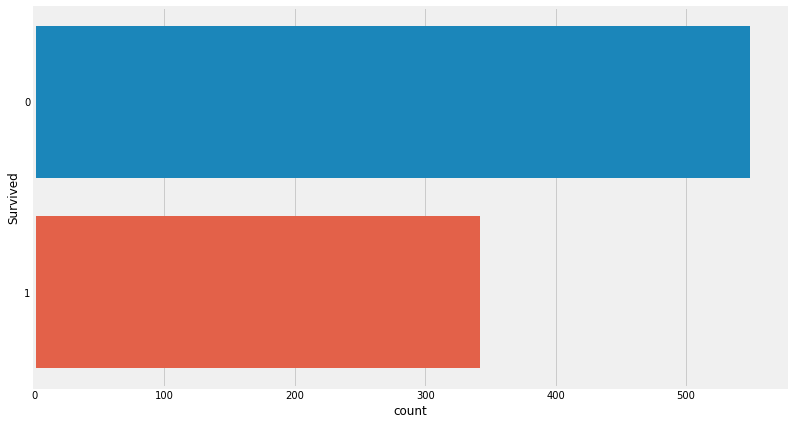

In [10]:
plt.figure(figsize = (12, 7))

sns.countplot(y = 'Survived', data = train_df)
plt.show()

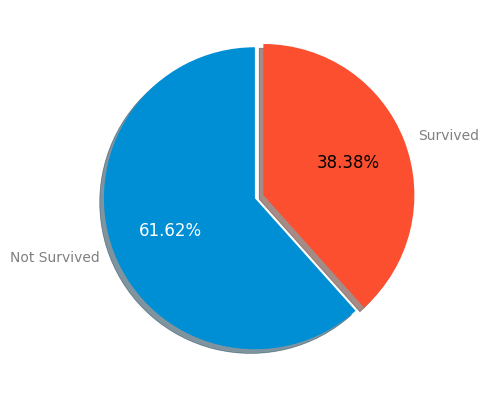

In [11]:
values = train_df['Survived'].value_counts()
labels = ['Not Survived', 'Survived']

fig, ax = plt.subplots(figsize = (5, 5), dpi = 100)
explode = (0, 0.06)

patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 12, color = 'white')
autotexts[1].set_color('black')
plt.show()

<a id = '2.2'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Pclass Column</strong></p> 

In [12]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
train_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

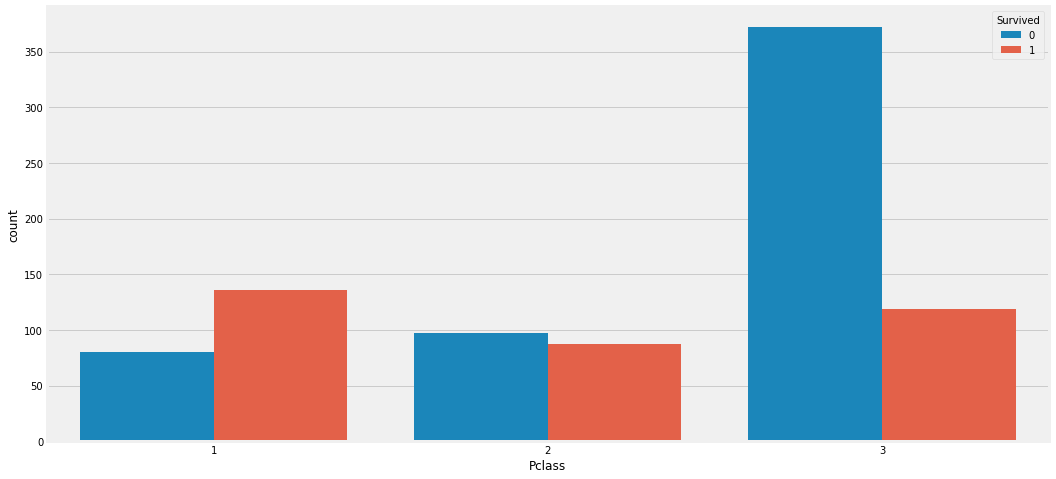

In [14]:
plt.figure(figsize = (16, 8))

sns.countplot('Pclass', hue = 'Survived', data = train_df)
plt.show()

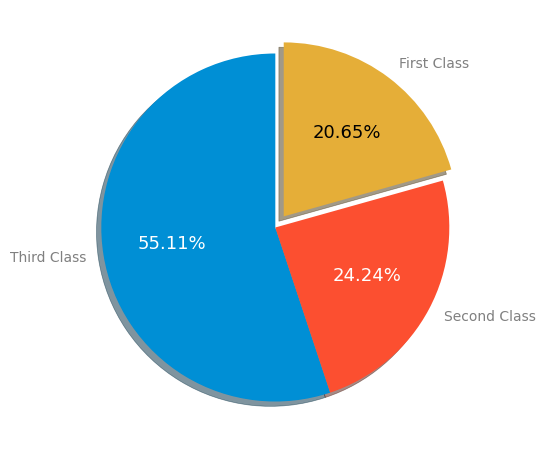

In [15]:
values = train_df['Pclass'].value_counts()
labels = ['Third Class', 'Second Class', 'First Class']
explode = (0, 0, 0.08)

fig, ax = plt.subplots(figsize = (5, 6), dpi = 100)
patches, texts, autotexts = ax.pie(values, labels = labels, autopct = '%1.2f%%', shadow = True,
                                   startangle = 90, explode = explode)

plt.setp(texts, color = 'grey')
plt.setp(autotexts, size = 13, color = 'white')
autotexts[2].set_color('black')
plt.show()

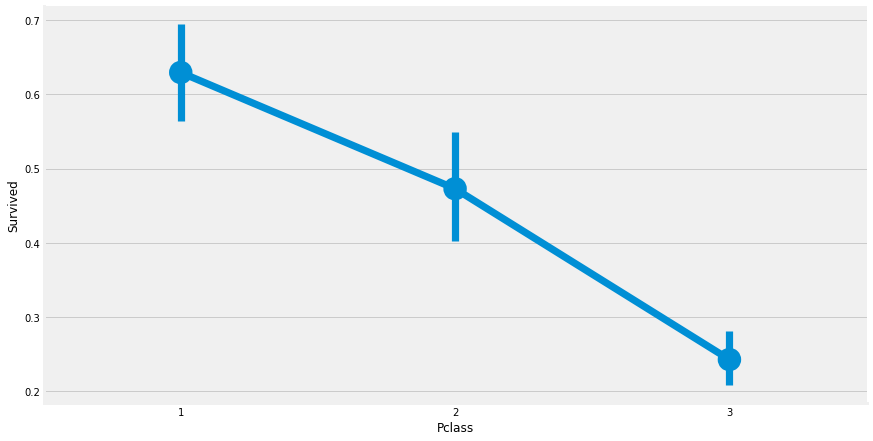

In [16]:
sns.catplot('Pclass', 'Survived', kind = 'point', data = train_df, height = 6, aspect = 2)
plt.show()

<a id = '2.3'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Name Column</strong></p> 

In [17]:
train_df.Name.value_counts()

Vande Walle, Mr. Nestor Cyriel                         1
Jacobsohn, Mr. Sidney Samuel                           1
Karun, Miss. Manca                                     1
Webber, Mr. James                                      1
Troutt, Miss. Edwina Celia "Winnie"                    1
                                                      ..
Compton, Miss. Sara Rebecca                            1
Swift, Mrs. Frederick Joel (Margaret Welles Barron)    1
Cairns, Mr. Alexander                                  1
Rice, Master. Eric                                     1
Levy, Mr. Rene Jacques                                 1
Name: Name, Length: 891, dtype: int64

In [18]:
len(train_df.Name.unique()), train_df.shape

(891, (891, 12))

<a id = '2.4'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Sex Column</strong></p> 

In [19]:
train_df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
train_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

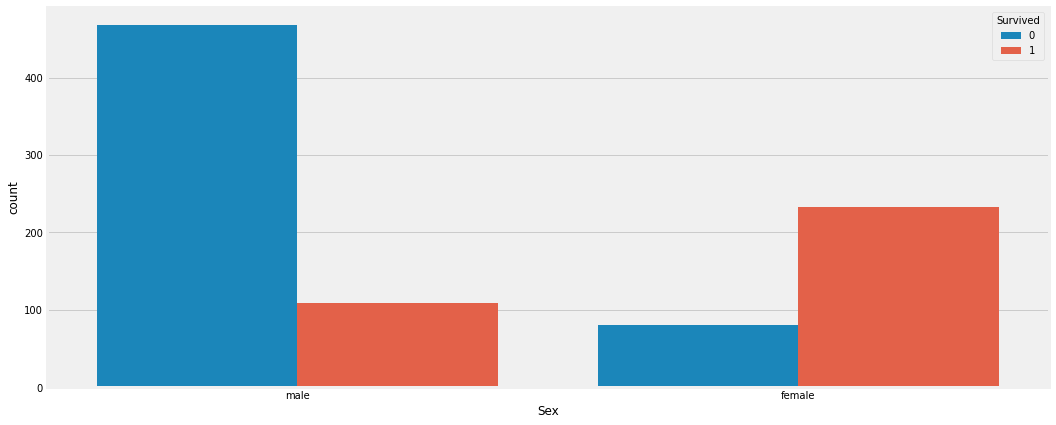

In [21]:
plt.figure(figsize = (16, 7))

sns.countplot('Sex', hue = 'Survived', data = train_df)
plt.show()

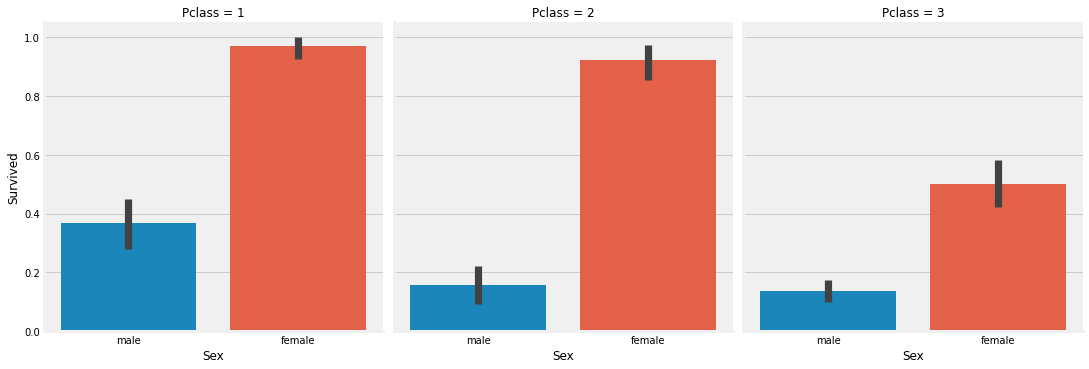

In [22]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'bar', col = 'Pclass')
plt.show()

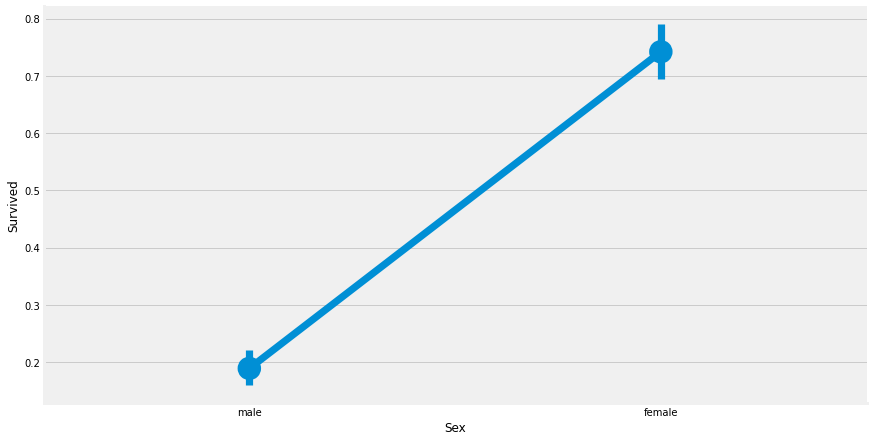

In [23]:
sns.catplot(x = 'Sex', y = 'Survived', data = train_df, kind = 'point', height = 6, aspect =2)
plt.show()

<Figure size 1080x432 with 0 Axes>

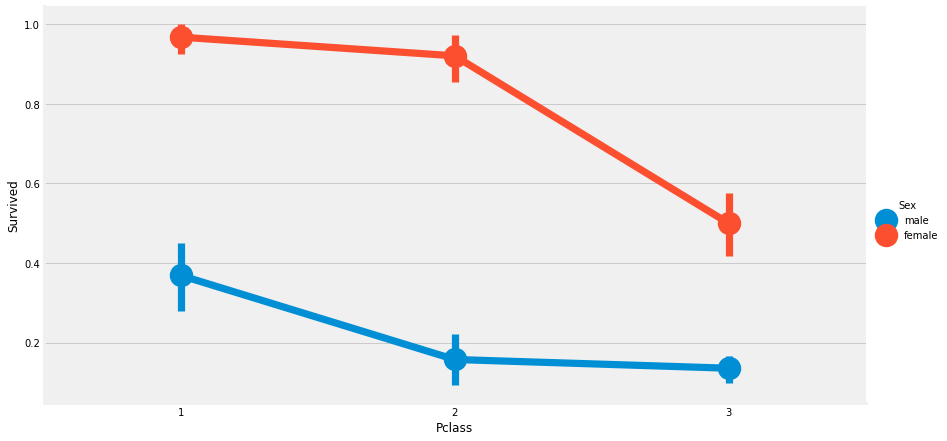

In [24]:
plt.figure(figsize = (15, 6))

sns.catplot(x = 'Pclass', y = 'Survived', kind = 'point', data = train_df, hue = 'Sex', height = 6, aspect = 2)
plt.show()

<a id = '2.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Age Column</strong></p> 

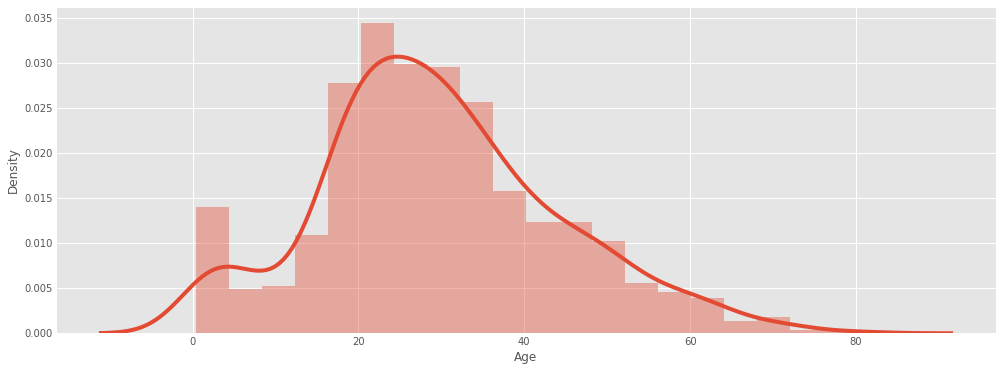

In [25]:
plt.figure(figsize = (15, 6))
plt.style.use('ggplot')

sns.distplot(train_df['Age'])
plt.show()

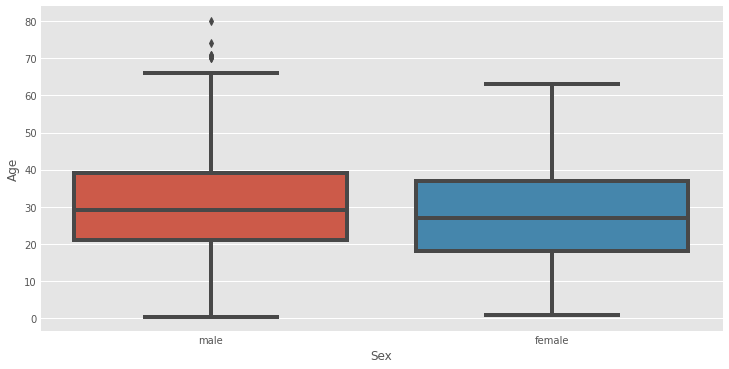

In [26]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, height = 5, aspect = 2)
plt.show()

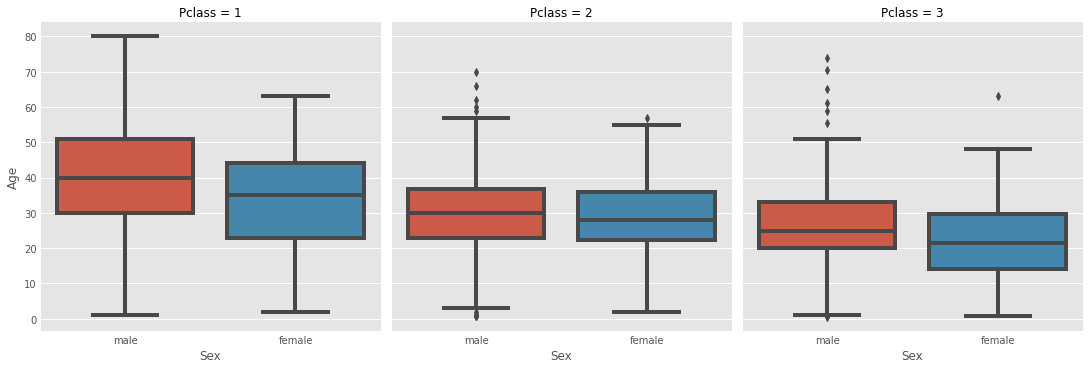

In [27]:
sns.catplot(x = 'Sex', y = 'Age', kind = 'box', data = train_df, col = 'Pclass')
plt.show()

<a id = '2.6'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Fare Column</strong></p> 

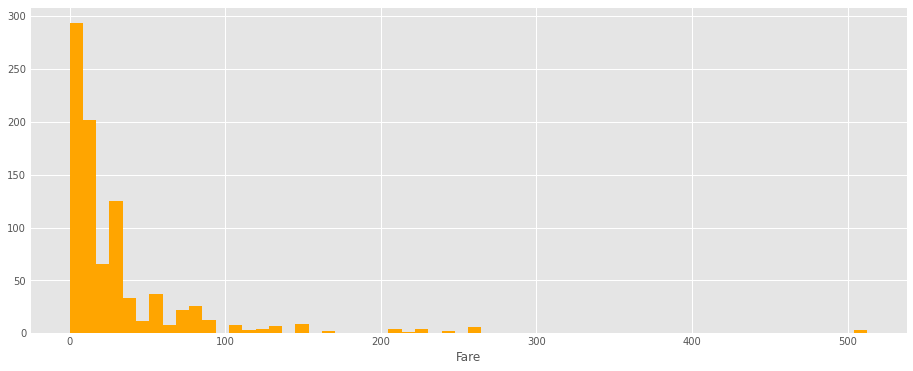

In [28]:
plt.figure(figsize = (14, 6))

plt.hist(train_df.Fare, bins = 60, color = 'orange')
plt.xlabel('Fare')
plt.show()

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>We can see that lot of zero values are there in Fare column so we will replace zero values with mean value of Fare column later.</strong></p> 

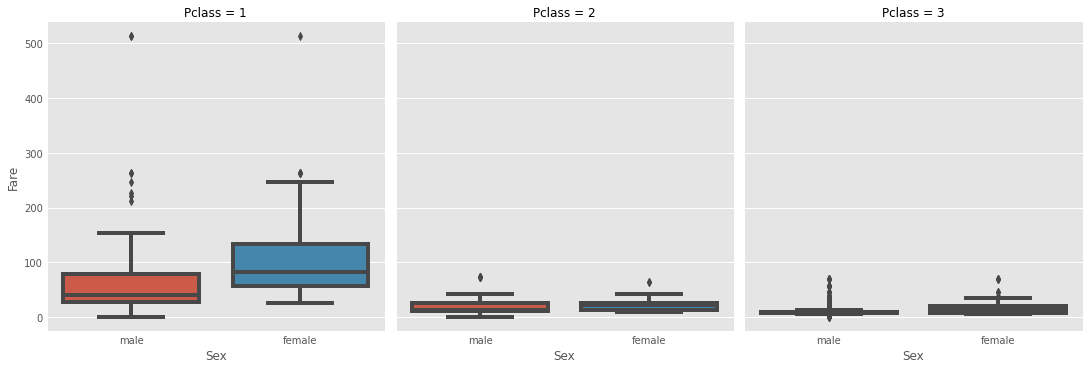

In [29]:
sns.catplot(x = 'Sex', y = 'Fare', data = train_df, kind = 'box', col = 'Pclass')
plt.show()

<a id = '2.7'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>SibSp Column</strong></p> 

In [30]:
train_df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

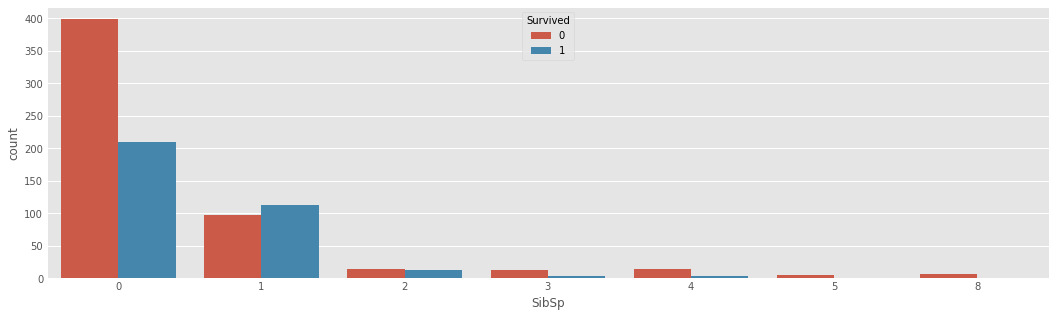

In [31]:
plt.figure(figsize = (16, 5))

sns.countplot(x = 'SibSp', data = train_df, hue = 'Survived')
plt.show()

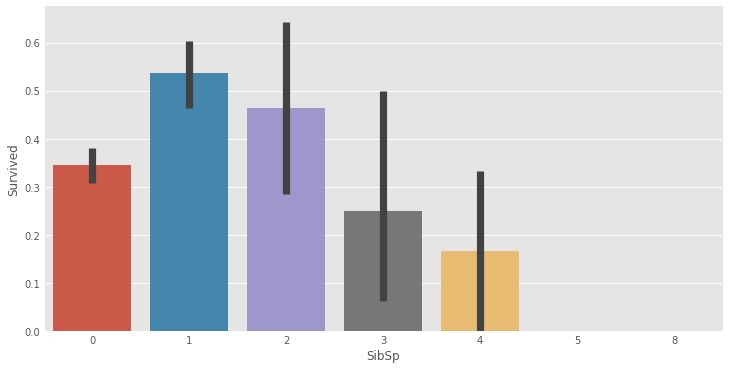

In [32]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', data = train_df, height = 5, aspect =2)
plt.show()

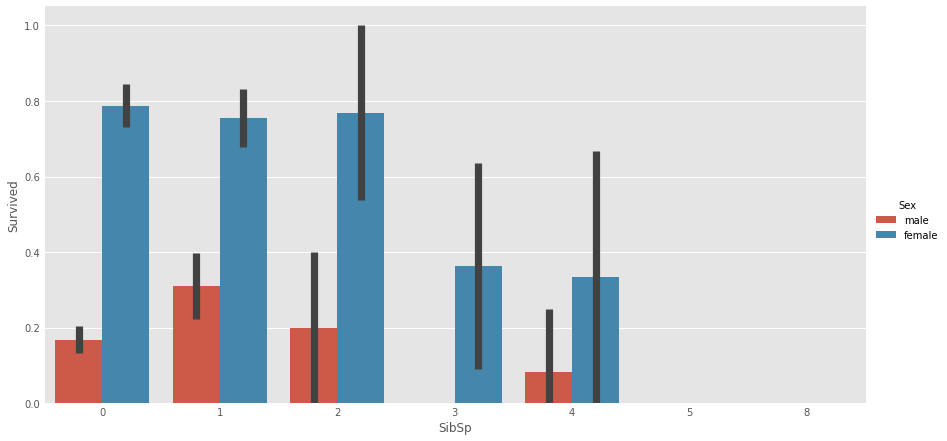

In [33]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'bar', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

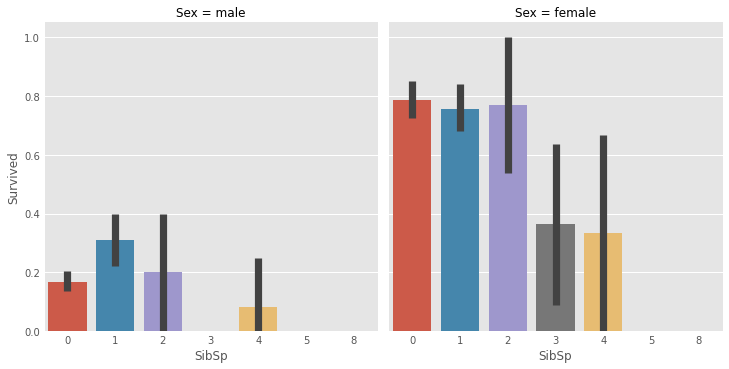

In [34]:
sns.catplot(x = 'SibSp',  y = 'Survived', kind = 'bar', col = 'Sex', data = train_df)
plt.show()

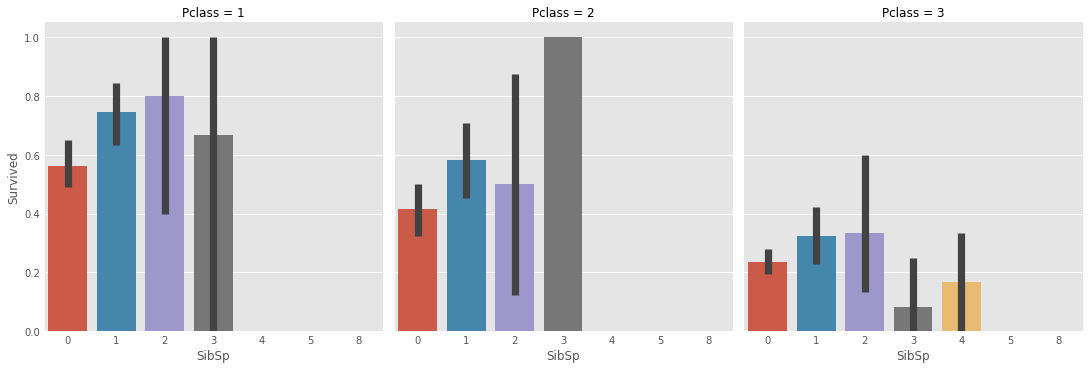

In [35]:
sns.catplot(x = 'SibSp', y = 'Survived', col = 'Pclass', kind = 'bar', data = train_df)
plt.show()

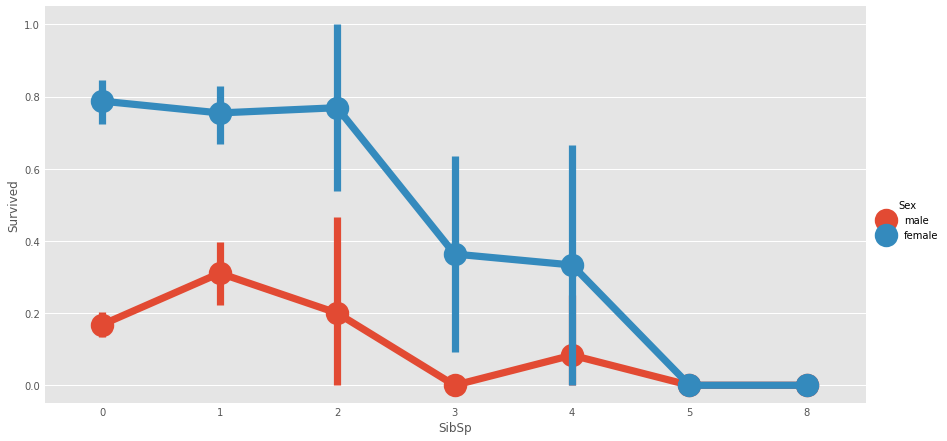

In [36]:
sns.catplot(x = 'SibSp', y = 'Survived', kind = 'point', hue = 'Sex', data = train_df, height = 6, aspect = 2)
plt.show()

<a id = '2.8'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Parch Column</strong></p> 

In [37]:
train_df.Parch.value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

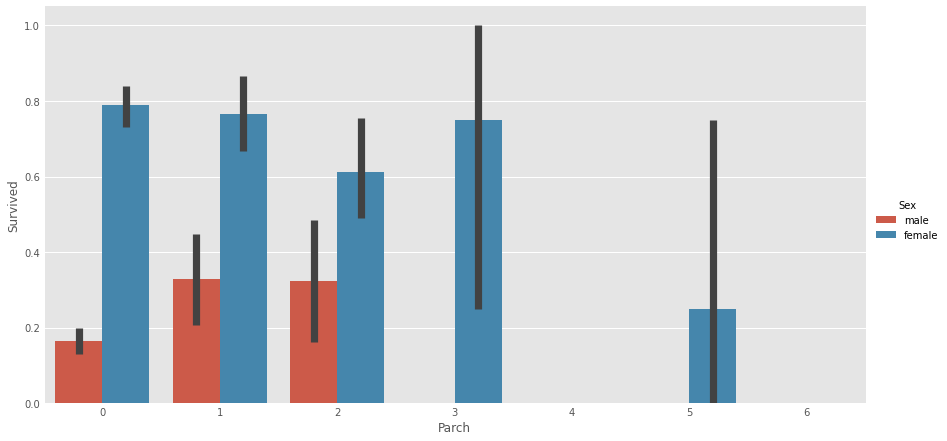

In [38]:
sns.catplot(x = 'Parch', y = 'Survived', data = train_df, hue = 'Sex', kind = 'bar', height = 6, aspect = 2)
plt.show()

<a id = '2.9'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Ticket Column</strong></p> 

In [39]:
train_df.Ticket.value_counts()

1601           7
347082         7
CA. 2343       7
3101295        6
CA 2144        6
              ..
343276         1
345774         1
349221         1
S.O.P. 1166    1
11769          1
Name: Ticket, Length: 681, dtype: int64

In [40]:
len(train_df.Ticket.unique())

681

<a id = '2.10'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Embarked Column</strong></p> 

In [41]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

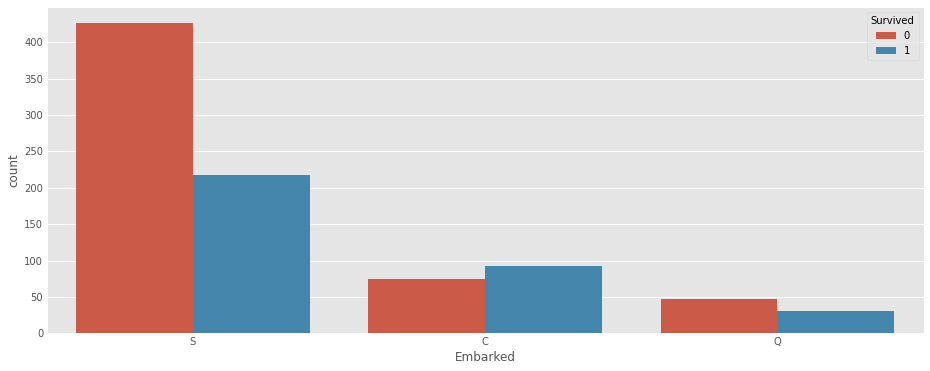

In [42]:
plt.figure(figsize = (14, 6))

sns.countplot('Embarked', hue = 'Survived', data = train_df)
plt.show()

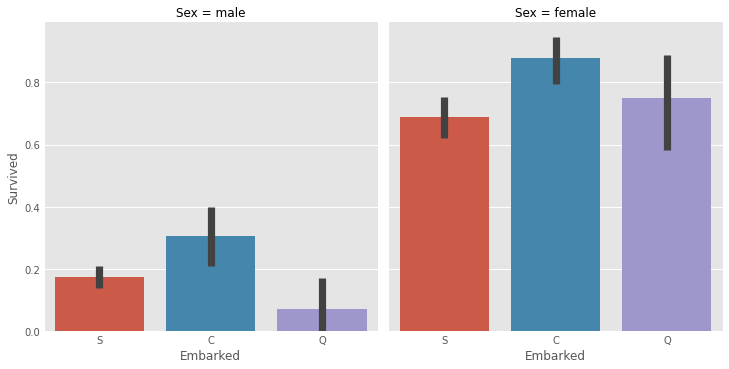

In [43]:
sns.catplot(x = 'Embarked', y = 'Survived', kind = 'bar', data = train_df, col = 'Sex')
plt.show()

Findings From EDA :-

Females Survived more than Males.
Passengers Travelling in Higher Class Survived More than Passengers travelling in Lower Class.
Name column is having all unique values so this column is not suitable for prediction, we have to drop it.
In First Class Females were more than Males, that's why Fare of Females Passengers were high.
Survival Rate is higher for those who were travelling with siblings or spouses.
Passengers travelling with parents or children have higher survival rate.
Ticket column is not useful and does not have an impact on survival.
Cabin column have a lot of null values , it will be better to drop this column.
Passengers travelling from Cherbourg port survived more than passengers travelling from other two ports